In [1]:
# import of packages
import pandas as pd
import matplotlib.pyplot as plt

# Data paths
ATAC_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/ATAC-seq_called-peaks_ImmGenATAC18_AllOCRsInfo.csv"
RNA_seq_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv"
Transcription_exons_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/Transkrips-exon_refFlat.txt"
Cell_population_qc_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/cell-populations_qc-matrices_mmc1.xlsx"
Voluntary_path = "/Users/laila/github/Bioinfo Projekt 25/Raw data/voluntary_ImmGenATAC18_AllTFmotifsInOCRs.txt"

# Load data sets
ATAC_seq = pd.read_csv(ATAC_seq_path)
RNA_seq = pd.read_csv(RNA_seq_path)
Cell_population_qc = pd.read_excel(Cell_population_qc_path)

# wie txt einlesen, sortierung iwi komisch
##Transcription_exons
##Voluntary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

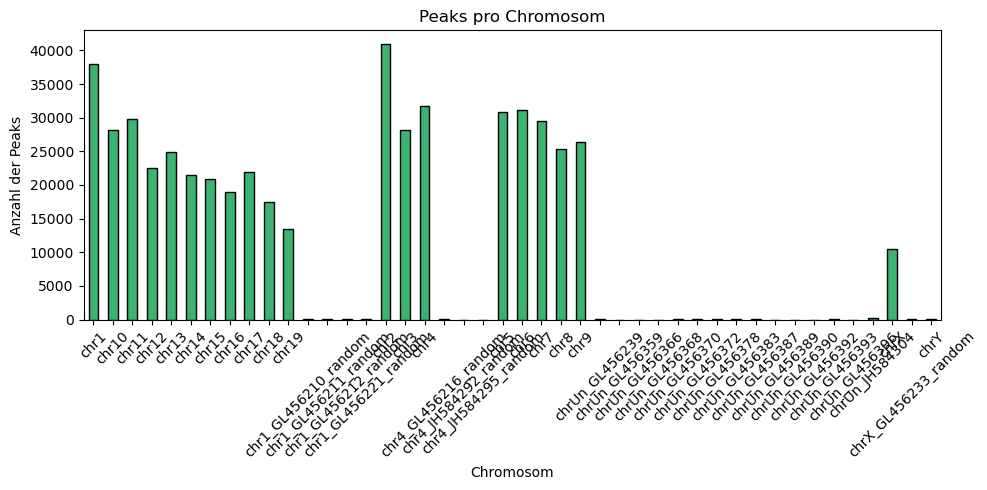

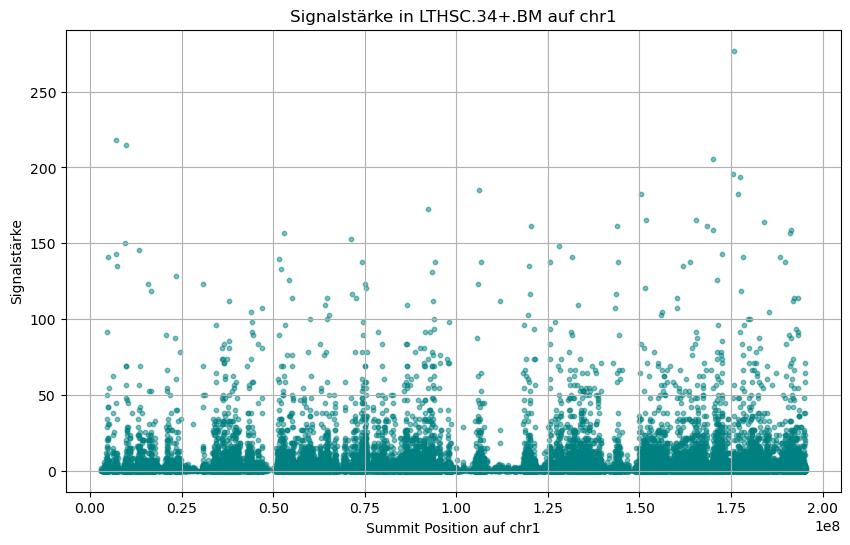

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,3.19,1.37,0.52,1.27,0.10,0.57,3.27,1.41
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,1.64,...,1.70,0.10,1.41,0.47,0.11,0.92,0.98,2.16,2.34,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,2.36,0.10,...,0.87,0.54,2.72,0.95,0.11,63.38,8.92,1.33,1.04,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.41,0.10,...,0.44,1.83,0.66,0.11,0.92,13.50,0.98,1.28,1.04,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,1.79,0.51,0.92,0.75,1.33,1.61,4.50


In [3]:
# peak ATAC histogram
#plt.hist(ATAC_seq["PeakScore"], bins=30, color="skyblue", edgecolor="black")
#plt.title("Histogram of Peak Scores ATAC-seq")
#plt.xlabel("Peak Score")
#plt.ylabel("Frequency")
#plt.show()

ATAC_seq.head()
ATAC_seq.info()

# Anzahl der Peaks pro Chromosom
chrom_counts = ATAC_seq["chrom"].value_counts().sort_index()

plt.figure(figsize=(10,5))
chrom_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Peaks pro Chromosom")
plt.xlabel("Chromosom")
plt.ylabel("Anzahl der Peaks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# log10 best p val
#?

# peak signal für Dendritische Zellen, CD4+, Milz (Spleen)

# X-Achse: Summit-Position (Peak-Zentrum)
ATAC_seq["Summit"] = pd.to_numeric(ATAC_seq["Summit"], errors="coerce")
x = ATAC_seq["Summit"]

# Y-Achse: Signalstärke für eine bestimmte Zelle
y = ATAC_seq["LTHSC.34+.BM"]

chr1 = ATAC_seq[ATAC_seq["chrom"] == "chr1"]

plt.figure(figsize=(10, 6))
plt.scatter(chr1["Summit"], chr1["LTHSC.34+.BM"], alpha=0.5, s=10, color='teal')
plt.title("Signalstärke in LTHSC.34+.BM auf chr1")
plt.xlabel("Summit Position auf chr1")
plt.ylabel("Signalstärke")
plt.grid(True)
plt.show()

ATAC_seq.head()




In [6]:
ATAC_seq.duplicated('ImmGenATAC1219.peakID').sum()

np.int64(0)